## Chunking

In [ ]:
#Arreglar edge cases con heuristica
#Intentar hacer division por saltos de linea antes del regex (Max n. caract por linea) (min y max lineas por chunk)
#Verificar max y min numero de lineas por chunk 
#Buscar que las oraciones que se hagan embeddings tengan long. quasi-homogenea
#Fine tune sliding window ?
# Heuristica para definir metodo de thresholding a partir de num. lineas del documento -> modo automatico

In [1]:
import sys
import os
sys.path.append('/data/grafa/')

In [2]:
import re
from grafa.stage_retrieval import get_document, get_document_lines
from grafa.stage_chunking import grafa_chunking, agentic_chunking

In [3]:
document = get_document('test')

In [25]:
# Uso de la función
file_path = "test"  # Reemplazar con la ruta real del archivo
max_chars_per_line = 200
min_chars_per_line = 100
min_lines_per_chunk = 5
max_lines_per_chunk = 10

chunks = grafa_chunking(file_path, max_chars_per_line, min_chars_per_line, min_lines_per_chunk, max_lines_per_chunk)

23


In [4]:
len(chunks)

3

In [26]:
for chunk in chunks:
    print(chunk)
    print('---------------------')

Intro to Chunking for RAG Chunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors. These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries.  There are several different chunking strategies:  Fixed-size chunking Recursive chunking Document-specific chunking Semantic chunking Agentic chunking But not all chunking is created equal. A common yet simplistic approach is to chunk documents based on arbitrary size—splitting text after a certain number of tokens (characters or words). While straightforward, this method can result in chunks that cut off important context, such as splitting a sentence or paragraph mid-thought. This leads to RAG systems generating responses based on fragmented or incomplete information. That’s where the semantic chunking method comes into play. We have already written in more detail about what chunking documents for RAG is and how

In [27]:
agentic_chunks = agentic_chunking(file_path, max_chars_per_line, min_chars_per_line, min_lines_per_chunk, max_lines_per_chunk)

23
Using Percentile Thresholding
Indices above threshold : [13, 17]
END
INDEX : 12 - Health insurance document automation works by using advanced technologies to streamline the handling, analysis, and management of healthcare documents.
BEFORE SENTENCE
INDEX : 11 - Additionally, platforms like Pinecone provide storage and retrieval capabilities that integrate seamlessly with semantic chunking methods.  Other tools for semantic chunking include:  ...LangGraph.  LangChain. Azure AI Document Intelligence. LlamaIndex. Semantic Text Splitter libraries Hugging Face Transformers.    How Health Insurance Document Automation Works
END
INDEX : 16 - Classification: Categorize documents by context or type, such as claims, appeals, or patient information
BEFORE SENTENCE
INDEX : 15 - processing of unstructured and semi-structured data.  Key capabilities of insurance document automation solutions in health insurance include:  Data extraction: Extract relevant data from diverse document formats Valida

In [6]:
strings = "How Health Insurance Document Automation Works"
count = 0
for c in strings:
    count +=1
print(count)

46


In [ ]:
def split_text_into_chunks(filename, max_chars_per_line, min_chars_per_line, min_lines_per_chunk, max_lines_per_chunk):
    """
    Divide el contenido de un archivo de texto en "chunks" según las reglas dadas.

    Args:
        file_path (str): Ruta al archivo de texto.
        max_chars_per_line (int): Número máximo de caracteres permitidos por línea.
        min_lines_per_chunk (int): Número mínimo de líneas por chunk.
        max_lines_per_chunk (int): Número máximo de líneas por chunk.

    Returns:
        list: Lista de "chunks", donde cada chunk es una cadena de texto.
    """
    lines = get_document_lines(filename)

    # Asegúrate de que cada línea no exceda el máximo de caracteres por línea y cumpla el mínimo
    processed_lines = []
    temp_line = ""

    for line in lines:
        line = line.strip()  # Elimina espacios en blanco al inicio y al final

        # Si la línea actual es corta, guárdala para unirla con la anterior
        if len(line) < min_chars_per_line:
            if processed_lines:
                # Une la línea corta con la última línea procesada
                processed_lines[-1] += " " + line
            else:
                # Si no hay líneas procesadas, guarda como temporal
                temp_line = line
        else:
            # Si hay una línea temporal, añádela al inicio de la línea actual
            if temp_line:
                line = temp_line + " " + line
                temp_line = ""

            # Divide líneas largas únicamente en espacios para evitar cortar palabras
            if len(line) > max_chars_per_line:
                words = line.split()
                current_line = ""
                for word in words:
                    if len(current_line) + len(word) + 1 <= max_chars_per_line:
                        current_line += (" " + word if current_line else word)
                    else:
                        processed_lines.append(current_line)
                        current_line = word
                if current_line:
                    processed_lines.append(current_line)
            else:
                processed_lines.append(line)

    # Si queda una línea temporal al final, añádela
    if temp_line:
        processed_lines[-1] = processed_lines[-1] + " " + temp_line

    print(processed_lines)
    return processed_lines

    # Crear chunks basados en el número mínimo y máximo de líneas por chunk
    # chunks = []
    # current_chunk = []

    # for line in processed_lines:
    #     current_chunk.append(line)
    #     if len(current_chunk) == max_lines_per_chunk:
    #         chunks.append(''.join(current_chunk))
    #         current_chunk = []

    # # Si el chunk actual tiene al menos min_lines_per_chunk líneas, agrégalo
    # if current_chunk and len(current_chunk) >= min_lines_per_chunk:
    #     chunks.append(''.join(current_chunk))

    # return chunks

# Uso de la función
file_path = "test"  # Reemplazar con la ruta real del archivo
max_chars_per_line = 200
min_chars_per_line = 100
min_lines_per_chunk = 5
max_lines_per_chunk = 10

lines = split_text_into_chunks(file_path, max_chars_per_line, min_chars_per_line, min_lines_per_chunk, max_lines_per_chunk)

# Imprime los chunks resultantes
# for i, chunk in enumerate(chunks):
#     print(f"Chunk {i+1}:")
#     print(chunk)
#     print("\n" + "-"*40 + "\n")

for i, line in enumerate(lines):
    print(f"Line {i+1}")
    print(line)
    print("\n" + "-"*40 + "\n")

In [4]:
from grafa.stage_chunking import semantic_chunking

chunks = semantic_chunking(document, use_percentile=False)

137
135
188
148
141
92
57
173
37
116
160
174
158
178
135
137
56
9
30
10
58
197
143
245
562
125
151
111
202
175
21


In [29]:
len(chunks)

4

In [30]:
for chunk in chunks:
    print(chunk)
    print('---------------------')

Intro to Chunking for RAG
Chunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries There are several different chunking strategies:

Fixed-size chunking
Recursive chunking
Document-specific chunking
Semantic chunking
Agentic chunking
But not all chunking is created equal A common yet simplistic approach is to chunk documents based on arbitrary size—splitting text after a certain number of tokens (characters or words) While straightforward, this method can result in chunks that cut off important context, such as splitting a sentence or paragraph mid-thought This leads to RAG systems generating responses based on fragmented or incomplete information That’s where the semantic chunking method comes into play We have already written in more detail about what chunking documents for RAG is and how to do i

In [8]:
# Improved regex to handle listings
pattern = r'(?<!\d)\.(?=\s+|$)|[?!](?=\s+|$)'
single_sentences_list = re.split(pattern, document)

# Remove empty strings and strip whitespace
single_sentences_list = [sentence.strip() for sentence in single_sentences_list if sentence.strip()]


print(f"{len(single_sentences_list)} sentences were found")
print(single_sentences_list)

31 sentences were found
['Intro to Chunking for RAG\nChunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors', 'These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries', 'There are several different chunking strategies:\n\nFixed-size chunking\nRecursive chunking\nDocument-specific chunking\nSemantic chunking\nAgentic chunking\nBut not all chunking is created equal', 'A common yet simplistic approach is to chunk documents based on arbitrary size—splitting text after a certain number of tokens (characters or words)', 'While straightforward, this method can result in chunks that cut off important context, such as splitting a sentence or paragraph mid-thought', 'This leads to RAG systems generating responses based on fragmented or incomplete information', 'That’s where the semantic chunking method comes into play', 'We have already written in more detail a

In [99]:
processed_lines = []
temp_line = ""
for sentence in single_sentences_list:
        # Si hay una línea temporal, añádela a la línea actual
        if temp_line:
            sentence = temp_line + " " + sentence
            temp_line = ""

        # Divide líneas largas
        # Divide líneas largas únicamente en espacios para evitar cortar palabras
        if len(sentence) > 200:
            words = sentence.split()
            current_line = ""
            for word in words:
                if len(current_line) + len(word) + 1 <= 200:
                    current_line += (" " + word if current_line else word)
                else:
                    processed_lines.append(current_line)
                    current_line = word
            if current_line:
                processed_lines.append(current_line)
        elif len(sentence) < 50:
            # Guarda líneas cortas temporalmente para unirlas con la siguiente
            temp_line = sentence
        else:
            processed_lines.append(sentence)

# Si queda una línea temporal al final, añádela
if temp_line:
    processed_lines[-1] = processed_lines[-1] + " " + temp_line

In [100]:
print(f"{len(processed_lines)} sentences were found")
print(processed_lines)

9 sentences were found
['<titulo>\n    Cuadrantes de desempeño de promociones\n</titulo>\n<descripcion>\n    Una manera de clasificar el desempeño de promociones es utilizando cuadrantes', 'Dependiendo de la posición en el gráfico de dos variables (volumen incremental en measurement_unit, y ROI), se puede clasificar el desempeño de una promoción', 'Los cuadrantes se definen de la siguiente manera: - Cuadrante verde: volumen incremental positivo y ROI positivo - Cuadrante amarillo 1: volumen incremental positivo y ROI negativo o cero - Cuadrante', 'amarillo 2: volumen incremental negativo o cero y ROI positivo - Cuadrante rojo: volumen incremental negativo y ROI negativo o cero Las promociones deseables son las que se encuentran en el cuadrante', 'verde', 'Las promociones que se deben evitar son las que se encuentran en el cuadrante rojo', 'Las promociones que pueden ser interesantes de analizar son las que se encuentran en el cuadrante amarillo', '</descripcion> <ejemplo> Cuadrante,Núm

In [9]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences

[{'sentence': 'Intro to Chunking for RAG\nChunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors',
  'index': 0},
 {'sentence': 'These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries',
  'index': 1},
 {'sentence': 'There are several different chunking strategies:\n\nFixed-size chunking\nRecursive chunking\nDocument-specific chunking\nSemantic chunking\nAgentic chunking\nBut not all chunking is created equal',
  'index': 2},
 {'sentence': 'A common yet simplistic approach is to chunk documents based on arbitrary size—splitting text after a certain number of tokens (characters or words)',
  'index': 3},
 {'sentence': 'While straightforward, this method can result in chunks that cut off important context, such as splitting a sentence or paragraph mid-thought',
  'index': 4},
 {'sentence': 'This leads to RAG systems generating responses based on fragmen

In [101]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(processed_lines)]
sentences


[{'sentence': '<titulo>\n    Cuadrantes de desempeño de promociones\n</titulo>\n<descripcion>\n    Una manera de clasificar el desempeño de promociones es utilizando cuadrantes',
  'index': 0},
 {'sentence': 'Dependiendo de la posición en el gráfico de dos variables (volumen incremental en measurement_unit, y ROI), se puede clasificar el desempeño de una promoción',
  'index': 1},
 {'sentence': 'Los cuadrantes se definen de la siguiente manera: - Cuadrante verde: volumen incremental positivo y ROI positivo - Cuadrante amarillo 1: volumen incremental positivo y ROI negativo o cero - Cuadrante',
  'index': 2},
 {'sentence': 'amarillo 2: volumen incremental negativo o cero y ROI positivo - Cuadrante rojo: volumen incremental negativo y ROI negativo o cero Las promociones deseables son las que se encuentran en el cuadrante',
  'index': 3},
 {'sentence': 'verde', 'index': 4},
 {'sentence': 'Las promociones que se deben evitar son las que se encuentran en el cuadrante rojo',
  'index': 5},
 

In [10]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [11]:
sentences[:3]

[{'sentence': 'Intro to Chunking for RAG\nChunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors',
  'index': 0,
  'combined_sentence': 'Intro to Chunking for RAG\nChunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries'},
 {'sentence': 'These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries',
  'index': 1,
  'combined_sentence': 'Intro to Chunking for RAG\nChunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors These vectors are later retrieved by the Retrieval Augmented Generation (RAG) system to provide context when responding to user queries There are several different chunking strategies:\n\nFixed-size

In [12]:
from langchain.embeddings import OpenAIEmbeddings
oaiembeds = OpenAIEmbeddings()

/tmp/ipykernel_22923/662863333.py:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  oaiembeds = OpenAIEmbeddings()


In [13]:
embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])

In [14]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [16]:
distances, sentences = calculate_cosine_distances(sentences)


In [17]:
distances

[0.014149362191932857,
 0.03796812940953398,
 0.06306170787534793,
 0.07180167073152866,
 0.07369181973380512,
 0.05846755809925264,
 0.044038149532512505,
 0.034004044783014886,
 0.05792133124916121,
 0.034504252353537046,
 0.04707549124813171,
 0.05744333977252025,
 0.02165398900855542,
 0.045118006936314625,
 0.07805477116953063,
 0.040740484294190527,
 0.08863991767818846,
 0.12795077375643793,
 0.11942920632926535,
 0.08565482989616546,
 0.04826188541569765,
 0.07047437458579642,
 0.03719837436527473,
 0.06818649191960158,
 0.02651106064016795,
 0.1541452614301938,
 0.038447660253265625,
 0.0390462674752603,
 0.06760284352702417,
 0.06243547270723937]

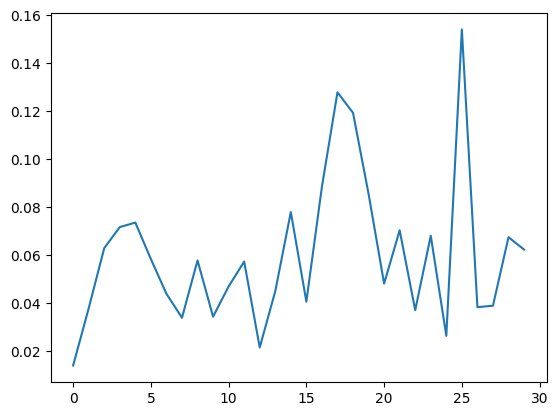

In [18]:
import matplotlib.pyplot as plt

plt.plot(distances)

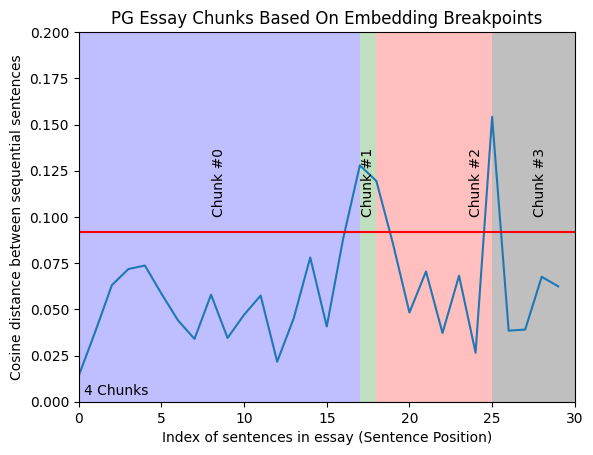

In [21]:
import numpy as np

plt.plot(distances)

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

breakpoint_percentile_threshold = 90
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) 
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [22]:
indices_above_thresh

[17, 18, 25]

In [42]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index - 1

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index 

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)



In [43]:
for i, chunk in enumerate(chunks[:3]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
Intro to Chunking for RAG
Chunking involves splitting a document into smaller pieces—or chunks—that can be embedded and stored as vectors These vectors are later retrieved by the Retrieval Augmented G
...
ate seamlessly with semantic chunking methods Other tools for semantic chunking include:

LangChain
Azure AI Document Intelligence
LlamaIndex
Semantic Text Splitter libraries
Hugging Face Transformers


Chunk #1
How Health Insurance Document Automation Works
Health insurance document automation works by using advanced technologies to streamline the handling, analysis, and management of healthcare documents Th
...
Key capabilities of insurance document automation solutions in health insurance include: Data extraction: Extract relevant data from diverse document formats Validation: Cross-reference extracted data


Chunk #2
with internal systems or external databases Classification: Categorize documents by context or type, such as claims, appeals, or patient information Workflow

In [49]:
sentences[23]['sentence']

'In data analysis, cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space'